In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
pd_gun = pd.read_csv('gun-violence-data/gun-violence-data_01-2013_03-2018.csv')
pd_gun.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
#print(pd_gun.head())
#print(pd_gun.columns)

In [4]:
g = pd_gun.loc[:,["state","n_killed","n_injured"]]
f = pd.melt(g,id_vars="state", var_name="hurt", value_name="num_hurt")
e = f.groupby(["state","hurt"]).sum()
# multi indexing
e['hurt'] = e.index.get_level_values('hurt')
e['state'] = e.index.get_level_values('state')
e

num_hurt       hurt                 state
state                hurt                                                
Alabama              n_injured      2998  n_injured               Alabama
                     n_killed       1880   n_killed               Alabama
Alaska               n_injured       325  n_injured                Alaska
                     n_killed        267   n_killed                Alaska
Arizona              n_injured      1096  n_injured               Arizona
                     n_killed       1094   n_killed               Arizona
Arkansas             n_injured      1347  n_injured              Arkansas
                     n_killed        773   n_killed              Arkansas
California           n_injured      7644  n_injured            California
                     n_killed       5562   n_killed            California
Colorado             n_injured      1133  n_injured              Colorado
                     n_killed        796   n_killed              Colorado
Connecticut          n_injured      1258  n_injured           Connecticut
                     n_killed        341   n_killed           Connecticut
Delaware             n_injured       853  n_injured              Delaware
                     n_killed        217   n_killed              Delaware
District of Columbia n_injured      1415  n_injured  District of Columbia
                     n_killed        459   n_killed  District of Columbia
Florida              n_injured      7072  n_injured               Florida
                     n_killed       3909   n_killed               Florida
Georgia              n_injured      4056  n_injured               Georgia
                     n_killed       2456   n_killed               Georgia
Hawaii               n_injured        85  n_injured                Hawaii
                     n_killed         63   n_killed                Hawaii
Idaho                n_injured       149  n_injured                 Idaho
                     n_killed        166   n_killed                 Idaho
Illinois             n_injured     13514  n_injured              Illinois
                     n_killed       3409   n_killed              Illinois
Indiana              n_injured      2956  n_injured               Indiana
                     n_killed       1608   n_killed               Indiana
...                                  ...        ...                   ...
Oklahoma             n_injured      1550  n_injured              Oklahoma
                     n_killed        941   n_killed              Oklahoma
Oregon               n_injured       694  n_injured                Oregon
                     n_killed        446   n_killed                Oregon
Pennsylvania         n_injured      5056  n_injured          Pennsylvania
                     n_killed       2395   n_killed          Pennsylvania
Rhode Island         n_injured       346  n_injured          Rhode Island
                     n_killed         63   n_killed          Rhode Island
South Carolina       n_injured      3084  n_injured        South Carolina
                     n_killed       1610   n_killed        South Carolina
South Dakota         n_injured       114  n_injured          South Dakota
                     n_killed         90   n_killed          South Dakota
Tennessee            n_injured      4478  n_injured             Tennessee
                     n_killed       1824   n_killed             Tennessee
Texas                n_injured      6106  n_injured                 Texas
                     n_killed       5046   n_killed                 Texas
Utah                 n_injured       402  n_injured                  Utah
                     n_killed        282   n_killed                  Utah
Vermont              n_injured        73  n_injured               Vermont
                     n_killed         57   n_killed               Vermont
Virginia             n_injured      3566  n_injured              Virginia
                     n_killed       

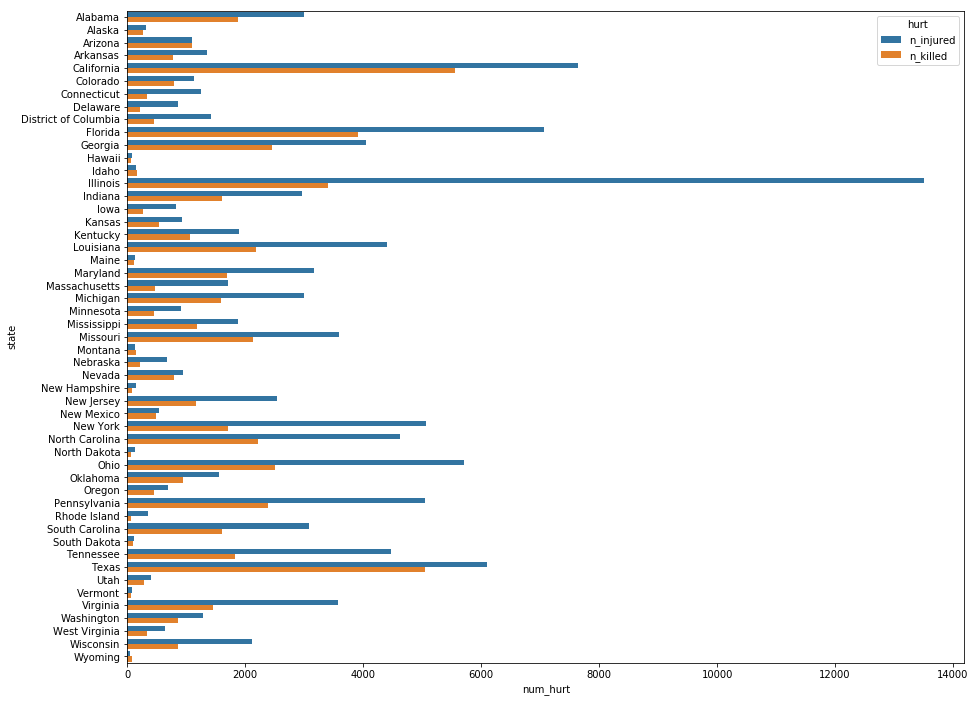

In [5]:
'''
plt.figure(figsize=(15,12))
a = sns.barplot(pd_state['n_killed'], pd_state.index, color="red")
plt.figure(figsize=(15,12))
b = sns.barplot(pd_state['n_injured'], pd_state.index, color="yellow")
'''


plt.figure(figsize=(15,12))
sns.barplot(x='num_hurt', y='state', hue="hurt", data=e)
del(e)
del(f)
del(g)

In [6]:
a = pd_gun.copy()
a['date'] = pd.to_datetime(a['date'])
# Series.dt()[source] Accessor object for datetimelike properties of the Series values.
a['year'] = a['date'].dt.year
a['month'] = a['date'].dt.month
a.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN,2013,1
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0,2013,1
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0,2013,1
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0,2013,1
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0,2013,1


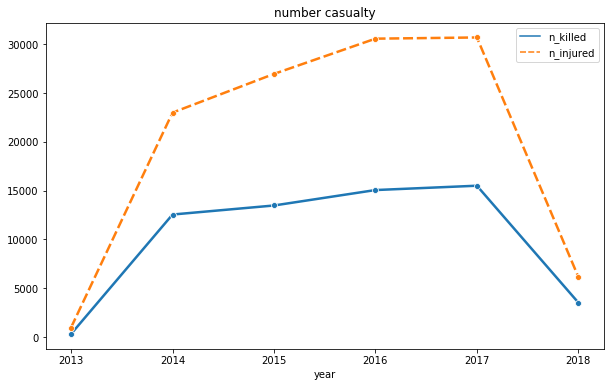

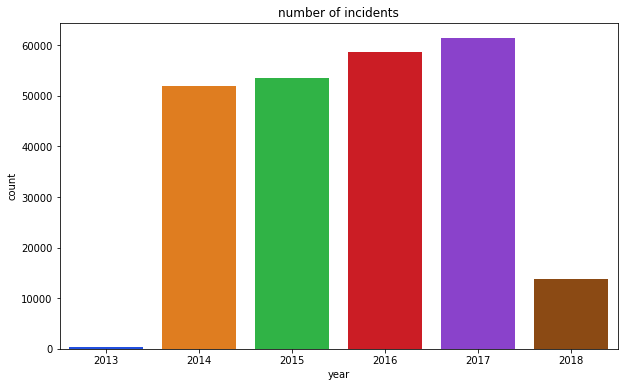

In [7]:
g = a.loc[:,["year","n_killed","n_injured"]]
e = g.groupby("year").sum()
e
plt.figure(figsize=(10,6))
sns.lineplot(data=e, palette="tab10", linewidth=2.5, marker='o')
plt.title('number casualty')

plt.figure(figsize=(10,6))
sns.countplot(x='year', data=a, palette='bright')
plt.title('number of incidents')
del(g)
del(a)
del(e)

In [8]:
a = pd_gun.copy()
a['Male'] = a['participant_gender'].str.count('M')
a['Female'] = a['participant_gender'].str.count('F')
a['participants'] = a['Male'] + a['Female']
a['date'] = pd.to_datetime(a['date'])
a['year'] = a['date'].dt.year
b = a.loc[:,["year","Male","Female","participants"]]
c = b.groupby('year').sum()
c


,Male,Female,participants
year,,,
2013,981.0,283.0,1264.0
2014,71798.0,10502.0,82300.0
2015,68781.0,9821.0,78602.0
2016,75707.0,10547.0,86254.0
2017,75484.0,9781.0,85265.0
2018,16340.0,2238.0,18578.0


Text(0.5, 1.0, '2016 participants')

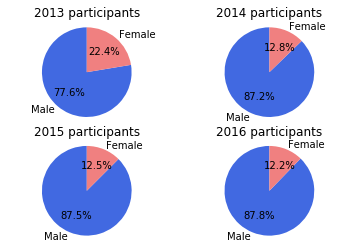

In [9]:

ax1 = plt.subplot2grid((2,2),(0,0))
labels = ['Male', 'Female']
sizes = [c.loc[2013,'Male'],c.loc[2013,'Female']]
colors = ['royalblue', 'lightcoral']
explode = (0, 0)  # explode 1st slice
#autopct enables you to display the percent value using Python string formatting
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('{} participants'.format(2013))

ax1 = plt.subplot2grid((2,2),(0,1))
labels = ['Male', 'Female']
sizes = [c.loc[2014,'Male'],c.loc[2014,'Female']]
colors = ['royalblue', 'lightcoral']
explode = (0, 0)  # explode 1st slice
#autopct enables you to display the percent value using Python string formatting
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('{} participants'.format(2014))

ax1 = plt.subplot2grid((2,2),(1,0))
labels = ['Male', 'Female']
sizes = [c.loc[2015,'Male'],c.loc[2015,'Female']]
colors = ['royalblue', 'lightcoral']
explode = (0, 0)  # explode 1st slice
#autopct enables you to display the percent value using Python string formatting
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('{} participants'.format(2015))

ax1 = plt.subplot2grid((2,2),(1,1))
labels = ['Male', 'Female']
sizes = [c.loc[2016,'Male'],c.loc[2016,'Female']]
colors = ['royalblue', 'lightcoral']
explode = (0, 0)  # explode 1st slice
#autopct enables you to display the percent value using Python string formatting
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=False, startangle=90)
plt.axis('equal')
plt.title('{} participants'.format(2016))


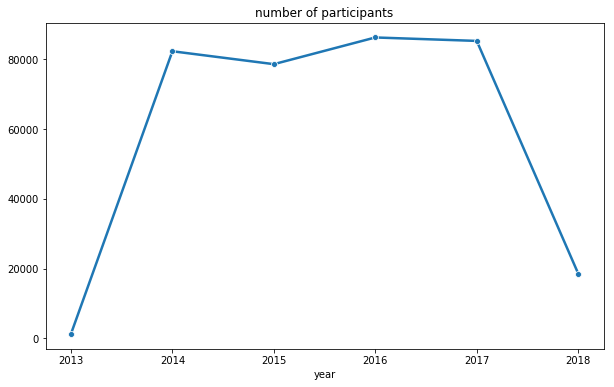

In [10]:
g = c.loc[:,["participants"]]
plt.figure(figsize=(10,6))
sns.lineplot(data=g, palette="tab10", linewidth=2.5, marker='o',legend=None)
plt.title('number of participants')
del(a)
del(g)
del(b)
del(c)

In [69]:
a = pd_gun.copy()
b = a.groupby('state').sum()
num_killed_dict = dict(zip(b.index,b['n_killed']))

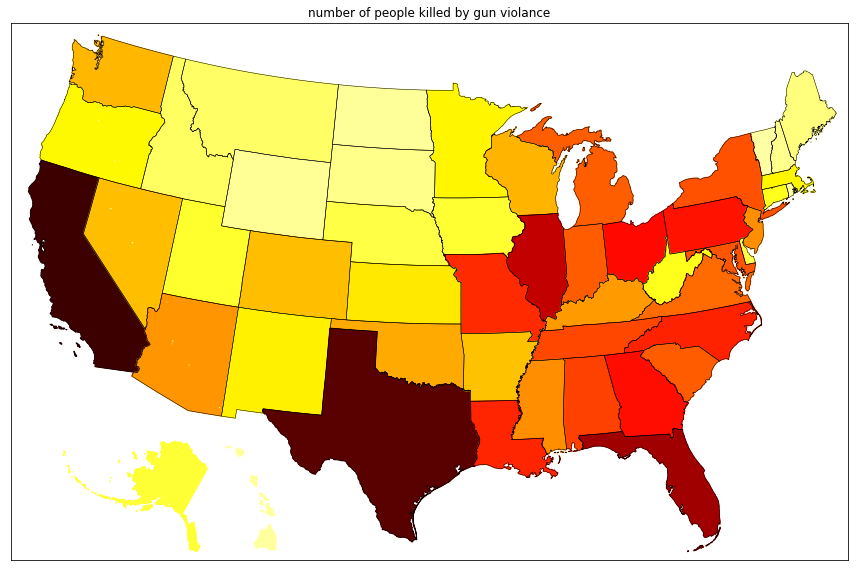

In [83]:
# https://github.com/matplotlib/basemap/tree/master/examples
# needs st99_d00.dbf, st99_d00.shp, st99_d00.shx

from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
fig = plt.figure(figsize=(15,12))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)

# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 6500 # set range.

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        n_death = num_killed_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # number of deaths), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((n_death-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
    # Offset Alaska and Hawaii to the lower-left corner. 
        if statenames[nshape] == 'Alaska':
        # Alaska is too big. Scale it down to 25% first, then transate it. 
            seg = list(map(lambda x: (0.25*x[0] + 1000000, 0.25*x[1]-900000), seg))
        if statenames[nshape] == 'Hawaii':
            seg = list(map(lambda x: (x[0] + 5100000, x[1]-1400000), seg))

        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('number of people killed by gun violance')


plt.show()
del(a)
del(b)